In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(
    "/home/chandler/direct/EvMatsim/contribs/ev/output/ITERS/it.0/0.countscompare.txt",
    sep="\t",
)
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,100,40001,1,0,127,-1.0,1.0,15.937
1,100,40001,2,0,86,-1.0,1.0,13.115
2,100,40001,3,0,75,-1.0,1.0,12.247
3,100,40001,4,0,84,-1.0,1.0,12.961
4,100,40001,5,0,150,-1.0,1.0,17.321


In [3]:
df["Link Id"].unique()

array([ 100, 1002, 1003, ...,  995,  996,  999], shape=(2270,))

In [10]:
link = 1021
dflink = df[df["Link Id"] == link]
dflink.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
240,1021,993103129,1,0,56,-1.0,1.0,10.583
241,1021,993103129,2,0,23,-1.0,1.0,6.782
242,1021,993103129,3,0,12,-1.0,1.0,4.899
243,1021,993103129,4,0,7,-1.0,1.0,3.742
244,1021,993103129,5,0,12,-1.0,1.0,4.899


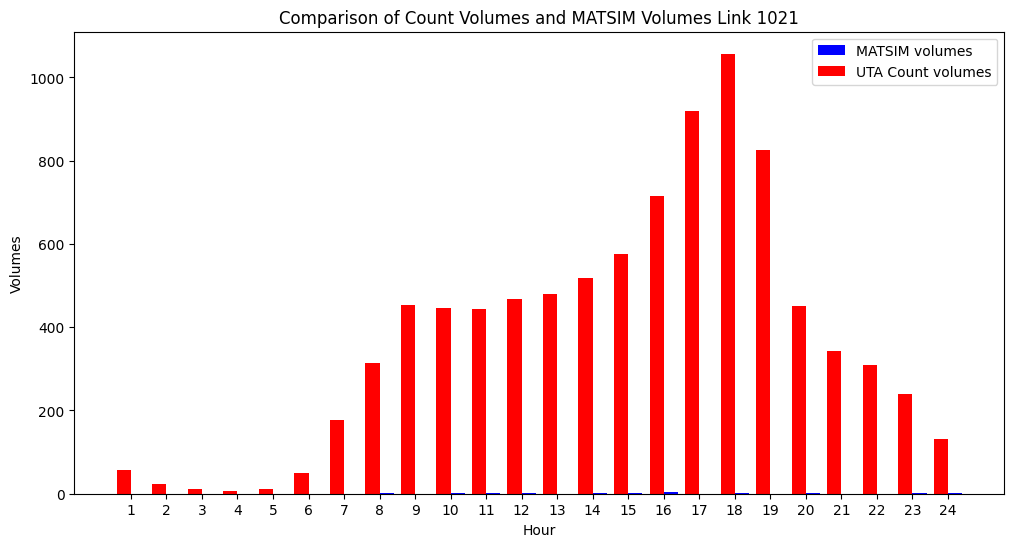

In [11]:
unique_hours = pd.unique(dflink["Hour"])
bar_width = 0.4  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

plt.bar(
    r2, dflink["MATSIM volumes"], color="blue", width=bar_width, label="MATSIM volumes"
)
# Plot Count volumes histogram
plt.bar(
    r1, dflink["Count volumes"], color="red", width=bar_width, label="UTA Count volumes"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.title(f"Comparison of Count Volumes and MATSIM Volumes Link {link}")
plt.xticks([r + bar_width / 2 for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()